### 2 - PRÉ-PROCESSAMENTO - TOKENIZAÇÃO E LEMATIZAÇÃO

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# CARREGANDO BIBLIOTECAS
import pandas as pd
import nltk
from nltk.stem import RSLPStemmer
import unidecode
import re
from collections import Counter, OrderedDict
import time
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
# CARREGANDO DADOS
df_reviews = pd.read_csv('df-reviews-ternario.csv')
df_reviews.head(3)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,app,sentimento
0,33b6e638-8373-4ec9-a0b4-4260cf0a91c1,Felipe Teixeira,https://play-lh.googleusercontent.com/a/AItbvm...,Prós - Comparado ao aplicativo das concorrente...,3,1558,20.20.0.100,2020-10-13 12:31:34,NaN,NaN,Amazon,neutro
1,490680d7-e9f4-4fde-bf8e-27b8b1c20e3b,Renan Cavagnolli,https://play-lh.googleusercontent.com/a/AItbvm...,"Tem alguns problemas. Ex: Na navegação, quando...",3,1883,20.10.0.100,2020-05-25 03:41:07,NaN,NaN,Amazon,neutro
2,5d50ac9d-1558-45de-aa7f-ec824c4eea62,Ígor X Costa,https://play-lh.googleusercontent.com/a-/AFdZu...,O aplicativo é bem básico. Tem informações suf...,3,1012,20.22.4.100,2020-12-23 10:12:01,NaN,NaN,Amazon,neutro


In [4]:
len(df_reviews)

319143

In [5]:
df_content = df_reviews.loc[0: ,["content", "sentimento"]]
df_content.head(5)

,content,sentimento
0,Prós - Comparado ao aplicativo das concorrente...,neutro
1,"Tem alguns problemas. Ex: Na navegação, quando...",neutro
2,O aplicativo é bem básico. Tem informações suf...,neutro
3,"Navegar pela lista de desejos, eventualmente, ...",neutro
4,Precisa melhorar a questão da interface e prin...,neutro


#### TOKENIZAÇÃO

In [ ]:
# PASSO 1 - REMOÇÃO DE CARACTERES: ACENTOS, PONTUAÇÕES, NÚMEROS E CONVERSÃO EM MINÚSCULAS;
# - EXIBIR FREQUÊNCIA DE PALAVRAS;
# - NUVEM DE PALAVRAS: TRÊS CLASSES;
# PASSO 2 - CORREÇÃO ORTOGRÁFICA, CORREÇÃO DIGITAÇÃO, REMOÇÃO DE LETRAS REPETIDAS ETC
# PASSO 3 - REMOÇÃO DAS STOPWORDS;
# - NUVEM DE PALAVRAS: TRÊS CLASSES

In [6]:
# CRIANDO NOVA WORDCLOUD ANTES DA LIMPEZA
textos1 = df_content['content'].tolist() 
texto_wordcloud1  = " ".join(textos1)

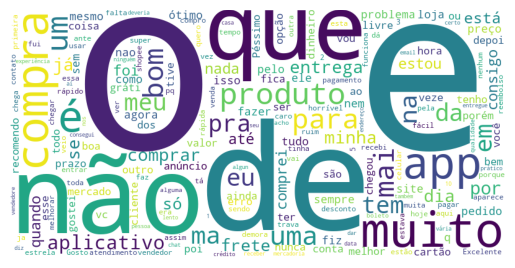

In [7]:
# WORDCLOUD
wordcloud1 = WordCloud(width = 800, height = 400, background_color = "white", collocations = False, 
                      include_numbers = True, random_state = 1)
wordcloud1.generate(texto_wordcloud1 )

# GRÁFICO
#plt.figure(figsize = (40, 8))
plt.axis("off")
plt.imshow(wordcloud1)
wordcloud1.to_file("wordcloud_antes.png")

In [8]:
# PASSO 1 - REMOÇÃO DE CARACTERES: ACENTOS, PONTUAÇÕES, NÚMEROS E CONVERSÃO EM MINÚSCULAS;
# FUNÇÃO DE REMOÇÃO
def RemoveCaracter(string):
    texto = unidecode.unidecode(string)                               # REMOVE ACENTOS
    texto = re.sub(r"[@#$%&*^~-´'²³\\//|<>:;,.!?'0-9]", " ", texto)
    texto = texto.replace('_','')
    texto = texto.replace('`','')
    texto = texto.replace('"','')
    texto = texto.replace('[','')
    texto = texto.replace(']','')
    texto = texto.replace('{','')
    texto = texto.replace('}','')
    texto = texto.replace('(','')
    texto = texto.replace(')','')
    texto = texto.replace('+','')
    texto = texto.replace('-','')
    texto = texto.replace('=','')

    texto = texto.lower()                                             # CONVERTE PARA MINÚSCULA
    
    return texto

In [9]:
df_content['passo1'] = df_reviews['content'].apply(RemoveCaracter)    # APLICA A FUNÇÃO DE REMOÇÃO
df_content = df_content.loc[0:,['sentimento', 'content', 'passo1']]

In [10]:
df_content.head(5)

,sentimento,content,passo1
0,neutro,Prós - Comparado ao aplicativo das concorrente...,pros comparado ao aplicativo das concorrentes...
1,neutro,"Tem alguns problemas. Ex: Na navegação, quando...",tem alguns problemas ex na navegacao quando...
2,neutro,O aplicativo é bem básico. Tem informações suf...,o aplicativo e bem basico tem informacoes suf...
3,neutro,"Navegar pela lista de desejos, eventualmente, ...",navegar pela lista de desejos eventualmente ...
4,neutro,Precisa melhorar a questão da interface e prin...,precisa melhorar a questao da interface e prin...


In [11]:
# FREQUÊNCIA DE PALAVRAS
lista_sentencas = df_content['passo1'].tolist()                                    # TRANSFORMA COLUNA EM LISTA
concatena_sentencas = " ".join(lista_sentencas)                                    # CONCATENA AS SENTENÇAS DA LISTA
lista_palavras = concatena_sentencas.split(" ")                                    # FAZ O SPLIT DAS PALAVRAS 
lista_palavras = [item.strip() for item in lista_palavras if item.strip() != '']   # REMOVE ITENS QUE SÃO ESPAÇOS

In [12]:
len(lista_palavras)

6371763

In [13]:
frequencia = Counter(lista_palavras) # GERA A FREQUÊNCIA DE CADA PALAVRA

In [14]:
frequencia_decrescente = {k: v for k, v in sorted(frequencia.items(), key = lambda item: item[1], reverse = True)}
dict(list(frequencia_decrescente.items())[:20]) # VISUALIZAR AS 20 PALAVRAS DE MAIOR FREQUÊNCIA

{'e': 290240,
 'o': 210675,
 'nao': 192964,
 'de': 180917,
 'que': 142610,
 'a': 135862,
 'muito': 85410,
 'app': 74837,
 'com': 67747,
 'no': 65212,
 'um': 65060,
 'do': 58851,
 'bom': 57526,
 'mais': 56923,
 'para': 55759,
 'compra': 52385,
 'uma': 50572,
 'mas': 44229,
 'da': 43418,
 'em': 42635}

In [15]:
len(frequencia_decrescente)

60439

In [16]:
frequencia_crescente = {k: v for k, v in sorted(frequencia.items(), key = lambda item: item[1], reverse = False)}
dict(list(frequencia_crescente.items())[:20]) # VISUALIZAR AS 20 PALAVRAS DE MENOR FREQUÊNCIA

{'saldoes': 1,
 'srou': 1,
 'tardio': 1,
 'resolverde': 1,
 'transparecia': 1,
 'xiava': 1,
 'ataquei': 1,
 'renovou': 1,
 'despriorizacao': 1,
 'presisar': 1,
 'suprida': 1,
 'misteira': 1,
 'reflexoes': 1,
 'dificulddades': 1,
 'kimetsu': 1,
 'yaiba': 1,
 'naaao': 1,
 'trilogia': 1,
 'indiana': 1,
 'embaralhadas': 1}

In [17]:
len(frequencia_crescente)

60439

In [18]:
# PASSO 2 - CORREÇÃO ORTOGRÁFICA, DIGITAÇÃO, REMOÇÃO DE LETRAS REPETIDAS EM PALAVRAS ALONGADAS 
ortografia = pd.read_csv('correcao-ortografica.csv', header = None, index_col = 0, squeeze = True).to_dict()

In [19]:
digitacao = pd.read_csv('correcao-digitacao.csv', header = None, index_col = 0, squeeze = True).to_dict()

In [20]:
separacao = pd.read_csv('separa-palavras.csv', header = None, index_col = 0, squeeze = True).to_dict()

In [21]:
# FUNÇÃO DE REMOÇÃO DE ESPAÇO
def RemoveEspaco(item):
    remove_espaco = item.strip() # REMOVE ESPAÇOS NO INÍCIO E NO FIM DA STRING
    return remove_espaco

In [22]:
digrafos_vogais = open("digrafos-vogais-identicas.txt", encoding = 'UTF-8')
digrafos_vogais = list(map(RemoveEspaco, digrafos_vogais))  

In [23]:
# FUNÇÃO DE CORREÇÃO 
def Correcao1(texto, correcao = ortografia):     
    lista_palavras = texto.split(" ") 
    lista_palavras = [item.strip() for item in lista_palavras if item.strip() != ''] 
    lista_corrigida = []
    
    
    for palavra in lista_palavras:
        if (palavra in correcao):
            palavra_correta = correcao.get(palavra)
            
            lista_corrigida.append(palavra_correta)
        else:
            lista_corrigida.append(palavra)
            continue
    
    texto_final = " ".join(lista_corrigida) 
    texto_final = RemoveCaracter(texto_final)

    return texto_final

In [24]:
def Correcao2(texto, correcao = digitacao):     
    lista_palavras = texto.split(" ") 
    lista_palavras = [item.strip() for item in lista_palavras if item.strip() != ''] 
    lista_corrigida = []
    
    for palavra in lista_palavras:
        if (palavra in correcao):
            palavra_correta = correcao.get(palavra)
            
            lista_corrigida.append(palavra_correta)
        else:
            lista_corrigida.append(palavra)
            continue
    

    texto_final = " ".join(lista_corrigida) 
    texto_final = RemoveCaracter(texto_final)

    return texto_final

In [25]:
# CORREÇÃO ESPECIFICA PARA ESTE ESTE EXPERIMENTO
def Correcao3(texto, correcao = separacao):     
    lista_palavras = texto.split(" ") 
    lista_palavras = [item.strip() for item in lista_palavras if item.strip() != ''] 
    lista_corrigida = []
    
    for palavra in lista_palavras:
        if (palavra in correcao):
            palavra_correta = correcao.get(palavra)
            
            lista_corrigida.append(palavra_correta)
        else:
            lista_corrigida.append(palavra)
            continue
    
    texto_final = " ".join(lista_corrigida) 
    texto_final = RemoveCaracter(texto_final)

    return texto_final

In [26]:
# CORREÇÃO ORTOGRAFICA
df_content['passo2'] = df_content['passo1'].apply(Correcao1)
df_content['passo2'] = df_content['passo2'].apply(Correcao2)
df_content['passo2'] = df_content['passo2'].apply(Correcao3)
df_content.head(5)

,sentimento,content,passo1,passo2
0,neutro,Prós - Comparado ao aplicativo das concorrente...,pros comparado ao aplicativo das concorrentes...,pros comparado ao aplicativo das concorrentes ...
1,neutro,"Tem alguns problemas. Ex: Na navegação, quando...",tem alguns problemas ex na navegacao quando...,tem alguns problemas ex na navegacao quando en...
2,neutro,O aplicativo é bem básico. Tem informações suf...,o aplicativo e bem basico tem informacoes suf...,o aplicativo e bem basico tem informacoes sufi...
3,neutro,"Navegar pela lista de desejos, eventualmente, ...",navegar pela lista de desejos eventualmente ...,navegar pela lista de desejos eventualmente to...
4,neutro,Precisa melhorar a questão da interface e prin...,precisa melhorar a questao da interface e prin...,precisa melhorar a questao da interface e prin...


In [27]:
# SEGUNDA REMOÇÃO DE PONTUAÇÃO 
df_content['passo2'] = df_content['passo2'].apply(RemoveCaracter)    # APLICA A FUNÇÃO DE REMOÇÃO

In [28]:
df_content.head(5)

,sentimento,content,passo1,passo2
0,neutro,Prós - Comparado ao aplicativo das concorrente...,pros comparado ao aplicativo das concorrentes...,pros comparado ao aplicativo das concorrentes ...
1,neutro,"Tem alguns problemas. Ex: Na navegação, quando...",tem alguns problemas ex na navegacao quando...,tem alguns problemas ex na navegacao quando en...
2,neutro,O aplicativo é bem básico. Tem informações suf...,o aplicativo e bem basico tem informacoes suf...,o aplicativo e bem basico tem informacoes sufi...
3,neutro,"Navegar pela lista de desejos, eventualmente, ...",navegar pela lista de desejos eventualmente ...,navegar pela lista de desejos eventualmente to...
4,neutro,Precisa melhorar a questão da interface e prin...,precisa melhorar a questao da interface e prin...,precisa melhorar a questao da interface e prin...


In [29]:
# REMOÇÃO DE PALAVRAS NÃO ÚTEIS
lista_exclusao = open("lista-exclusao.txt", encoding = 'UTF-8')
lista_exclusao = list(map(RemoveCaracter, lista_exclusao))    # RETIRA ACENTOS DAS STOPWORDS PARA IGUALAR AS PALAVRAS DO DATASET
lista_exclusao = list(map(RemoveEspaco, lista_exclusao))  

In [30]:
# FUNÇÃO DE REMOÇÃO DE PALAVRAS NÃO ÚTEIS
def RemovePalavras(texto, lista = lista_exclusao):     
    lista_palavras = texto.split(" ")                                                             # SPLIT DAS PALAVRAS
    remove_palavras = [palavras for palavras in lista_palavras if palavras not in lista_exclusao] # REMOVE PLAVRAS
    lista_palavras = [item.strip() for item in remove_palavras if item.strip() != '']             # REMOVE ITENS QUE SÃO ESPAÇOS
    texto_final = ' '.join(lista_palavras)                                                        # CONCATENA A LISTA
    return texto_final

In [31]:
df_content['passo3'] = df_content['passo2'].apply(RemovePalavras)

In [32]:
df_content.head(5)

,sentimento,content,passo1,passo2,passo3
0,neutro,Prós - Comparado ao aplicativo das concorrente...,pros comparado ao aplicativo das concorrentes...,pros comparado ao aplicativo das concorrentes ...,pros comparado ao aplicativo das concorrentes ...
1,neutro,"Tem alguns problemas. Ex: Na navegação, quando...",tem alguns problemas ex na navegacao quando...,tem alguns problemas ex na navegacao quando en...,tem alguns problemas ex na navegacao quando en...
2,neutro,O aplicativo é bem básico. Tem informações suf...,o aplicativo e bem basico tem informacoes suf...,o aplicativo e bem basico tem informacoes sufi...,aplicativo e bem basico tem informacoes sufici...
3,neutro,"Navegar pela lista de desejos, eventualmente, ...",navegar pela lista de desejos eventualmente ...,navegar pela lista de desejos eventualmente to...,navegar pela lista de desejos eventualmente to...
4,neutro,Precisa melhorar a questão da interface e prin...,precisa melhorar a questao da interface e prin...,precisa melhorar a questao da interface e prin...,precisa melhorar a questao da interface e prin...


In [33]:
# REMOVER LETRAS REPETIDAS EM PALAVRAS ALONGADAS
# FUNÇÃO PARA REMOÇÃO DE LETRAS REPETIDAS EM PALAVRAS ALONGADAS
def RemoveLetras(texto, lista = digrafos_vogais):
    lista_palavras =  texto.split(" ")  
    novo_texto = []
    vogais = ['a','e','i','o','u']
    consoantes = ['b','c','d','f','g','h','j','k','l','m','n','p','q','r','s','t','v','w','x','y','z']
    
    for palavra in  lista_palavras:
        palavra_separada = list(palavra)
        
        if (palavra in lista):
            novo_texto.append(palavra)
            
        elif (len(set(palavra_separada).intersection(consoantes)) > 0 and len(set(palavra_separada).intersection(vogais)) > 0 and palavra_separada not in lista):
            nova_palavra = []
            letra_inicial = palavra_separada[0]
            nova_palavra.append(letra_inicial)

            for i in range(1, len(palavra_separada)):
                    letra = palavra_separada[i]
                    
                    if (letra != palavra_separada[i-1]):
                        nova_palavra.append(letra) 
                    else:
                        continue 
            nova_palavra = "".join(nova_palavra)
            novo_texto.append(nova_palavra)
                    
        else:
            continue
            
    novo_texto = " ".join(novo_texto)
    return novo_texto

In [34]:
df_content['passo4'] = df_content['passo3'].apply(RemoveLetras)

In [35]:
# APLICANDO NOVAMENTE AS CORREÇÕES APÓS A REMOÇÃO DE LETRAS REPETIDAS EM PALAVRAS ALONGADAS
df_content['passo4'] = df_content['passo4'].apply(Correcao1)
df_content['passo4'] = df_content['passo4'].apply(Correcao2)

In [36]:
# REMOVER DE PONTUAÇÃO NOVAMENTE APÓS CORREÇÃO
df_content['passo4'] = df_content['passo4'].apply(RemoveCaracter)    # APLICA A FUNÇÃO DE REMOÇÃO

In [37]:
df_content.head(5)

,sentimento,content,passo1,passo2,passo3,passo4
0,neutro,Prós - Comparado ao aplicativo das concorrente...,pros comparado ao aplicativo das concorrentes...,pros comparado ao aplicativo das concorrentes ...,pros comparado ao aplicativo das concorrentes ...,pros comparado aplicativo das concorrentes de ...
1,neutro,"Tem alguns problemas. Ex: Na navegação, quando...",tem alguns problemas ex na navegacao quando...,tem alguns problemas ex na navegacao quando en...,tem alguns problemas ex na navegacao quando en...,tem alguns problemas ex na navegacao quando en...
2,neutro,O aplicativo é bem básico. Tem informações suf...,o aplicativo e bem basico tem informacoes suf...,o aplicativo e bem basico tem informacoes sufi...,aplicativo e bem basico tem informacoes sufici...,aplicativo bem basico tem informacoes suficien...
3,neutro,"Navegar pela lista de desejos, eventualmente, ...",navegar pela lista de desejos eventualmente ...,navegar pela lista de desejos eventualmente to...,navegar pela lista de desejos eventualmente to...,navegar pela lista de desejos eventualmente to...
4,neutro,Precisa melhorar a questão da interface e prin...,precisa melhorar a questao da interface e prin...,precisa melhorar a questao da interface e prin...,precisa melhorar a questao da interface e prin...,precisa melhorar questao da interface principa...


In [38]:
# PASSO 3 - REMOÇÃO DAS STOPWORDS 
stopwords = open("stopwords.txt", encoding = 'UTF-8')
stopwords = list(map(RemoveCaracter, stopwords))      # RETIRA ACENTOS DAS STOPWORDS PARA IGUALAR AS PALAVRAS DO DATASET
stopwords = list(map(RemoveEspaco, stopwords))        

In [39]:
# FUNÇÃO DE REMOÇÃO DE STOPWORDS
def RemoveStopwords(texto, stopwords = stopwords):     
    lista_palavras = texto.split(" ")                                                         # SPLIT DAS PALAVRAS
    remove_stopwords = [palavras for palavras in lista_palavras if palavras not in stopwords] # REMOVE STOPWORDS
    lista_palavras = [item.strip() for item in remove_stopwords if item.strip() != '']        # REMOVE ITENS QUE SÃO ESPAÇOS
    texto_final = ' '.join(lista_palavras)                                                    # CONCATENA A LISTA
    return texto_final

In [40]:
df_content['passo5'] = df_content['passo4'].apply(RemoveStopwords)

In [41]:
# QUANTIDADE DE ATRIBUTOS APÓS REMOÇÃO STOPWORDS
count_vectorizer1 = CountVectorizer(ngram_range = (1,1))
count_vectorizer1.fit_transform(df_content.passo5)
variaveis1 = count_vectorizer1.get_feature_names()

In [42]:
df_content.head(5)

,sentimento,content,passo1,passo2,passo3,passo4,passo5
0,neutro,Prós - Comparado ao aplicativo das concorrente...,pros comparado ao aplicativo das concorrentes...,pros comparado ao aplicativo das concorrentes ...,pros comparado ao aplicativo das concorrentes ...,pros comparado aplicativo das concorrentes de ...,pros comparado aplicativo concorrentes longe m...
1,neutro,"Tem alguns problemas. Ex: Na navegação, quando...",tem alguns problemas ex na navegacao quando...,tem alguns problemas ex na navegacao quando en...,tem alguns problemas ex na navegacao quando en...,tem alguns problemas ex na navegacao quando en...,alguns problemas ex navegacao entra produto ap...
2,neutro,O aplicativo é bem básico. Tem informações suf...,o aplicativo e bem basico tem informacoes suf...,o aplicativo e bem basico tem informacoes sufi...,aplicativo e bem basico tem informacoes sufici...,aplicativo bem basico tem informacoes suficien...,aplicativo bem basico informacoes suficientes ...
3,neutro,"Navegar pela lista de desejos, eventualmente, ...",navegar pela lista de desejos eventualmente ...,navegar pela lista de desejos eventualmente to...,navegar pela lista de desejos eventualmente to...,navegar pela lista de desejos eventualmente to...,navegar lista desejos eventualmente tornase im...
4,neutro,Precisa melhorar a questão da interface e prin...,precisa melhorar a questao da interface e prin...,precisa melhorar a questao da interface e prin...,precisa melhorar a questao da interface e prin...,precisa melhorar questao da interface principa...,precisa melhorar questao interface filtros cat...


In [43]:
# FREQUÊNCIA DE PALAVRAS
lista_sentencas2 = df_content['passo5'].tolist()                                    # TRANSFORMA COLUNA EM LISTA
concatena_sentencas = " ".join(lista_sentencas2)                                    # CONCATENA AS SENTENÇAS DA LISTA
lista_palavras2 = concatena_sentencas.split(" ")                                    # FAZ O SPLIT DAS PALAVRAS 
lista_palavras2 = [item.strip() for item in lista_palavras2 if item.strip() != '']  # REMOVE ITENS QUE SÃO ESPAÇOS

In [44]:
len(lista_palavras2)

3342097

In [45]:
frequencia2 = Counter(lista_palavras2) # GERA A FREQUÊNCIA DE CADA PALAVRA

In [46]:
frequencia_decrescente2 = {k: v for k, v in sorted(frequencia2.items(), key = lambda item: item[1], reverse = True)}

In [47]:
frequencia_decrescente2 = {k: v for k, v in sorted(frequencia2.items(), key = lambda item: item[1], reverse = False)}

In [48]:
# CRIAR NOVA WORDCLOUD APÓS LIMPEZA DOS DADOS
texto_wordcloud2 = " ".join(lista_palavras2)

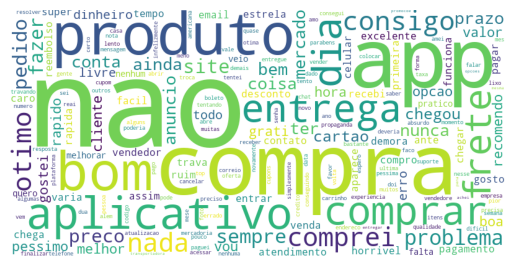

In [49]:
# WORDCLOUD
wordcloud2 = WordCloud(width = 800, height = 400, background_color = "white", collocations = False, 
                      include_numbers = True, random_state = 1)
wordcloud2.generate(texto_wordcloud2)

# GRÁFICO
#plt.figure(figsize = (40, 8))
plt.axis("off")
plt.imshow(wordcloud2)
wordcloud2.to_file("wordcloud-depois.png")

O "não" foi removido da lista de stopwords, pois se removido como stopwords iria afetar o sentido de algumas sentenças no português. Ex: "não é bom" (negativo), "é bom" (positivo).

#### LEMMATIZATION E STEMMING

In [50]:
# FUNÇÃO LEMMATIZATION
def Lematizacao(texto):
    lista_palavras = texto.split(" ") 
    lista_palavras = [item.strip() for item in lista_palavras if item.strip() != ''] 
    lista_lema = []

    
    for palavra in lista_palavras:
        if palavra in dicionario_lema.keys():
            palavra_lema = dicionario_lema.get(palavra)
            lista_lema.append(palavra_lema)
            
        else:
            lista_lema.append(palavra)
            
    texto_lema = ' '.join(lista_lema) 
    return texto_lema

In [51]:
# LEMATIZAÇÃO
arquivo_lema = open("lematizacao-portugues.txt", encoding = 'UTF-8')

In [52]:
dicionario_lema = {}

for linha in arquivo_lema:
    palavras = linha.split()
    dicionario_lema[RemoveCaracter(palavras[1])] = RemoveCaracter(palavras[0])

In [53]:
df_content['passo6'] = df_content['passo5'].apply(Lematizacao)

In [54]:
df_content.loc[:,['passo5','passo6']]

,passo5,passo6
0,pros comparado aplicativo concorrentes longe m...,pros comparar aplicativo concorrente longe mel...
1,alguns problemas ex navegacao entra produto ap...,algum problema ex navegacao entrar produto ape...
2,aplicativo bem basico informacoes suficientes ...,aplicativo bem basico informacao suficiente re...
3,navegar lista desejos eventualmente tornase im...,navegar lista desejo eventualmente tornase imp...
4,precisa melhorar questao interface filtros cat...,preciso melhorar questao interface filtro cate...
...,...,...
319138,aumenta,aumentar
319139,bom,bom
319140,gostei recomendo,gostar recomendar
319141,facil encontrar produtos qualidade gostei,facil encontrar produto qualidade gostar


In [55]:
# QUANTIDADE DE ATRIBUTOS APÓS LEMATIZAÇÃO
count_vectorizer2 = CountVectorizer(ngram_range = (1,1))
count_vectorizer2.fit_transform(df_content.passo6)
variaveis2 = count_vectorizer2.get_feature_names()

In [56]:
# COMPARAÇÃO QUANTIDADE DE PALAVRAS ANTES E DEPOIS DA LEMATIZAÇÃO
print(f"Quantidade de atributos após aplicação das stopwords: {len(variaveis1)} palavras")
print(f"Quantidade de atributos após aplicação da lematização: {len(variaveis2)} palavras")

Quantidade de atributos após aplicação das stopwords: 53680 palavras
Quantidade de atributos após aplicação da lematização: 37022 palavras


#### STEMMING


In [57]:
nltk.download('rslp')

[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\lealj\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

In [58]:
# FUNÇÃO STEMMING
def Stemming(texto):
    pt_stemmi = RSLPStemmer()
    lista_palavras = texto.split(" ") 
    lista_palavras = [item.strip() for item in lista_palavras if item.strip() != ''] 
    lista_stemmi = []

    
    for palavra in lista_palavras:
            lista_stemmi.append(pt_stemmi.stem(palavra))
            
    texto_stemmi = ' '.join(lista_stemmi) 
    return texto_stemmi

In [59]:
df_content['passo7'] = df_content['passo5'].apply(Stemming)

In [60]:
df_content.loc[:,['passo5','passo6','passo7']]

,passo5,passo6,passo7
0,pros comparado aplicativo concorrentes longe m...,pros comparar aplicativo concorrente longe mel...,pro compar aplic concorr long melhor lev intui...
1,alguns problemas ex navegacao entra produto ap...,algum problema ex navegacao entrar produto ape...,algum problem ex navegaca entr produt apert im...
2,aplicativo bem basico informacoes suficientes ...,aplicativo bem basico informacao suficiente re...,aplic bem basic informaco sufici realizaca com...
3,navegar lista desejos eventualmente tornase im...,navegar lista desejo eventualmente tornase imp...,naveg list desej event tornas impossi quant te...
4,precisa melhorar questao interface filtros cat...,preciso melhorar questao interface filtro cate...,precis melhor questa interfac filtr categor pr...
...,...,...,...
319138,aumenta,aumentar,aument
319139,bom,bom,bom
319140,gostei recomendo,gostar recomendar,gost recom
319141,facil encontrar produtos qualidade gostei,facil encontrar produto qualidade gostar,facil encontr produt qual gost


In [61]:
# VERIFICAR A EXISTÊNCIA DE VALORES NaN NO CAMPO DE COMENTÁRIOS DO PASSO 5
df_content[['passo6']].isna().values.any()

False

In [62]:
# VERIFICAR CAMPOS VAZIOS
df_content.loc[df_content['passo6'] == '']

,sentimento,content,passo1,passo2,passo3,passo4,passo5,passo6,passo7
1140,neutro,Mais do mesmo,mais do mesmo,mais do mesmo,mais do mesmo,mais do mesmo,,,
1164,neutro,Que a sws,que a sws,que a sws,que a sws,que,,,
1187,neutro,⁴disske 3613-7 i0k,disske i k,disske i k,,,,,
1191,neutro,Amazon,amazon,amazon,,,,,
1201,neutro,556 5,,,,,,,
...,...,...,...,...,...,...,...,...,...
318533,positivo,😁😁😁,,,,,,,
318592,positivo,👍👍👍,,,,,,,
318868,positivo,👍,,,,,,,
318977,positivo,🌵,,,,,,,


In [63]:
# REMOVE ESPAÇOS EM BRANCO
indices = df_content[df_content['passo6'] == ''].index
df_content.drop(indices , inplace = True)

In [64]:
# CRIAR DATASET BINÁRIO
df_content_binario = df_content[df_content['sentimento'] != 'neutro']
df_content_binario.head(5)

,sentimento,content,passo1,passo2,passo3,passo4,passo5,passo6,passo7
106381,negativo,"Promoção cartão sem anuidade, me enviaram e-ma...",promocao cartao sem anuidade me enviaram emai...,promocao cartao sem anuidade me enviaram email...,promocao cartao sem anuidade me enviaram email...,promocao cartao sem anuidade me enviaram email...,promocao cartao anuidade enviaram email tentei...,promocao cartao anuidade enviar email tentar f...,promoca carta anuidad envi email tent faz comp...
106382,negativo,"Este app e verdadeiramente uma piada, com preç...",este app e verdadeiramente uma piada com prec...,este app e verdadeiramente uma piada com preco...,este app e verdadeiramente uma piada com preco...,este app verdadeiramente uma piada com precos ...,app verdadeiramente piada precos exorbitantes ...,app verdadeiramente piar preco exorbitante pro...,app verdade pi prec exorbit produt falcific pl...
106383,negativo,Péssimo nao aceita meu email,pessimo nao aceita meu email,pessimo nao aceita meu email,pessimo nao aceita meu email,pessimo nao aceita meu email,pessimo nao aceita email,mau nao aceito email,pess nao aceit email
106384,negativo,Comprei vários produtos há uns meses atrás por...,comprei varios produtos ha uns meses atras por...,comprei varios produtos ha uns meses atras por...,comprei varios produtos ha uns meses atras por...,comprei varios produtos ha uns meses atras por...,comprei produtos meses atras mercadoria nao sa...,comprar produto mes atro mercadoria nao sair l...,compr produt mes atr mercad nao sai lig diz co...
106385,negativo,"O aplicativo é bom, mais eu me decepcionei com...",o aplicativo e bom mais eu me decepcionei com...,o aplicativo e bom mais eu me decepcionei com ...,aplicativo e bom mais eu me decepcionei com qu...,aplicativo bom mais me decepcionei com que qua...,aplicativo bom decepcionei qualidade produto,aplicativo bom decepcionar qualidade produto,aplic bom decepcion qual produt


In [65]:
# SALVAR ARQUIVO FINAL
df_content.to_csv('df-content-ternario.csv', index = False)  
df_content_binario.to_csv('df-content-binario.csv', index = False)  